**Forecasting Airline Passengers**

In [2]:
!curl https://assets.digitalocean.com/articles/eng_python/prophet/AirPassengers.csv -o 'aircraft.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1748  100  1748    0     0  10993      0 --:--:-- --:--:-- --:--:-- 10993


In [3]:
pip install pandas matplotlib numpy cython

In [4]:
pip install pystan

In [5]:
pip install fbprophet

In [0]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
df = pd.read_csv('aircraft.csv')

df.head(5)

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
df.dtypes

Month            object
AirPassengers     int64
dtype: object

In [9]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [10]:
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})

df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [13]:
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})

df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [0]:
my_model = Prophet(interval_width=0.95)

In [18]:
my_model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [20]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.059659,606.711791,692.253985
176,1963-09-01,602.755802,556.726795,648.629702
177,1963-10-01,566.569663,523.392835,612.031261
178,1963-11-01,534.733242,491.036995,579.696887
179,1963-12-01,564.363327,521.164226,604.533572


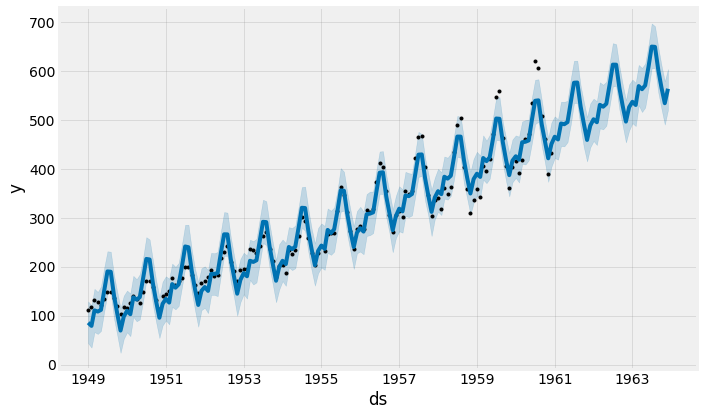

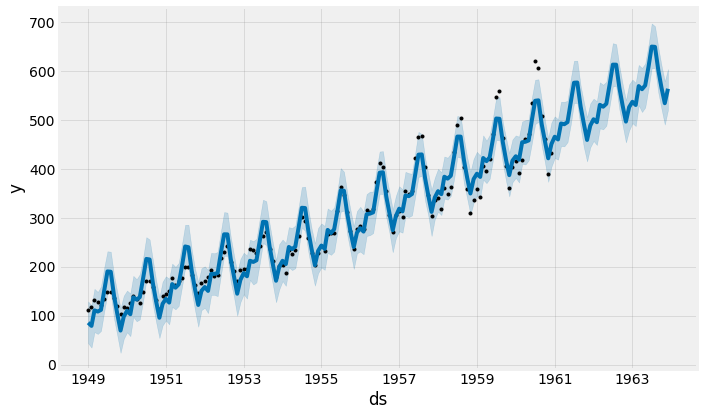

In [21]:
my_model.plot(forecast,
              uncertainty=True)

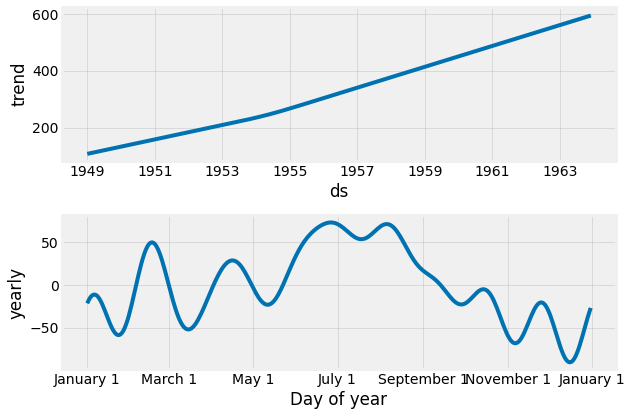

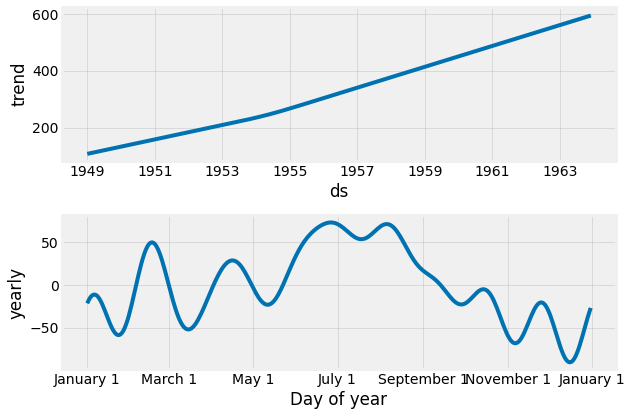

In [23]:
my_model.plot_components(forecast)